In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"C:\Users\mahmo\Documents\Final_Year_Project\Tomato_Data_Set"

In [3]:
CATEGORIES = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']

In [4]:
data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories)
    label = CATEGORIES.index(categories)
   # print(folder)
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        #print(img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(256,256))
        #print(img_arr)
        #plt.imshow(img_arr)
        #break
        data.append([img_arr,label])

In [5]:
data

[[array([[[166, 166, 172],
          [164, 164, 170],
          [168, 168, 174],
          ...,
          [106, 105, 115],
          [117, 116, 126],
          [128, 127, 137]],
  
         [[167, 167, 173],
          [162, 162, 168],
          [163, 163, 169],
          ...,
          [133, 132, 142],
          [146, 145, 155],
          [133, 132, 142]],
  
         [[172, 172, 178],
          [164, 164, 170],
          [162, 162, 168],
          ...,
          [110, 109, 119],
          [120, 119, 129],
          [137, 136, 146]],
  
         ...,
  
         [[158, 157, 167],
          [155, 154, 164],
          [157, 156, 166],
          ...,
          [100, 100, 112],
          [120, 120, 132],
          [ 95,  95, 107]],
  
         [[155, 154, 164],
          [150, 149, 159],
          [152, 151, 161],
          ...,
          [106, 106, 118],
          [114, 114, 126],
          [101, 101, 113]],
  
         [[157, 156, 166],
          [153, 152, 162],
          [159, 158, 168

In [6]:
random.shuffle(data) #mixup data

In [7]:
x = [] #image arry
y = [] #label

for features,label in data:
    x.append(features)
    y.append(label)

In [8]:
x = np.array(x) #convet x from list to array
y = np.array(y) #convert y from list to array

In [9]:
x

array([[[[196, 192, 204],
         [182, 178, 190],
         [142, 138, 150],
         ...,
         [119, 116, 131],
         [129, 126, 141],
         [126, 123, 138]],

        [[152, 148, 160],
         [152, 148, 160],
         [178, 174, 186],
         ...,
         [120, 117, 132],
         [141, 138, 153],
         [154, 151, 166]],

        [[127, 123, 135],
         [150, 146, 158],
         [143, 139, 151],
         ...,
         [112, 109, 124],
         [125, 122, 137],
         [117, 114, 129]],

        ...,

        [[182, 178, 190],
         [148, 144, 156],
         [169, 165, 177],
         ...,
         [121, 118, 133],
         [144, 141, 156],
         [116, 113, 128]],

        [[176, 172, 184],
         [148, 144, 156],
         [151, 147, 159],
         ...,
         [123, 120, 135],
         [138, 135, 150],
         [121, 118, 133]],

        [[149, 145, 157],
         [150, 146, 158],
         [174, 170, 182],
         ...,
         [130, 127, 142],
        

In [10]:
x = x/255

In [11]:
x

array([[[[0.76862745, 0.75294118, 0.8       ],
         [0.71372549, 0.69803922, 0.74509804],
         [0.55686275, 0.54117647, 0.58823529],
         ...,
         [0.46666667, 0.45490196, 0.51372549],
         [0.50588235, 0.49411765, 0.55294118],
         [0.49411765, 0.48235294, 0.54117647]],

        [[0.59607843, 0.58039216, 0.62745098],
         [0.59607843, 0.58039216, 0.62745098],
         [0.69803922, 0.68235294, 0.72941176],
         ...,
         [0.47058824, 0.45882353, 0.51764706],
         [0.55294118, 0.54117647, 0.6       ],
         [0.60392157, 0.59215686, 0.65098039]],

        [[0.49803922, 0.48235294, 0.52941176],
         [0.58823529, 0.57254902, 0.61960784],
         [0.56078431, 0.54509804, 0.59215686],
         ...,
         [0.43921569, 0.42745098, 0.48627451],
         [0.49019608, 0.47843137, 0.5372549 ],
         [0.45882353, 0.44705882, 0.50588235]],

        ...,

        [[0.71372549, 0.69803922, 0.74509804],
         [0.58039216, 0.56470588, 0.61176471]

In [12]:
x.shape

(1359, 256, 256, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

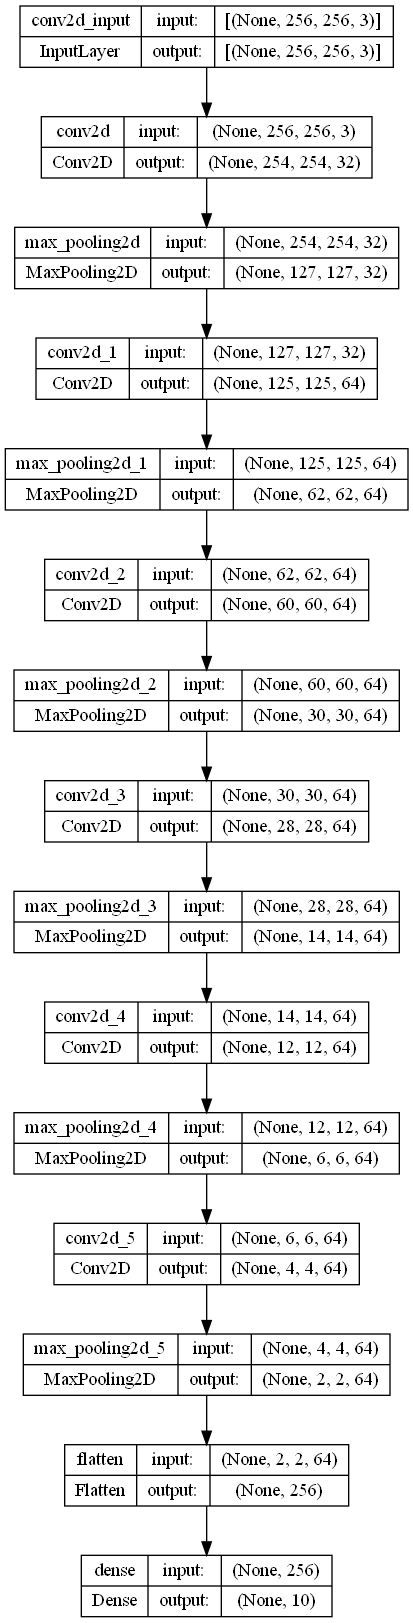

In [16]:
#Plot Model from tf
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="plot_model.png",show_shapes=True)

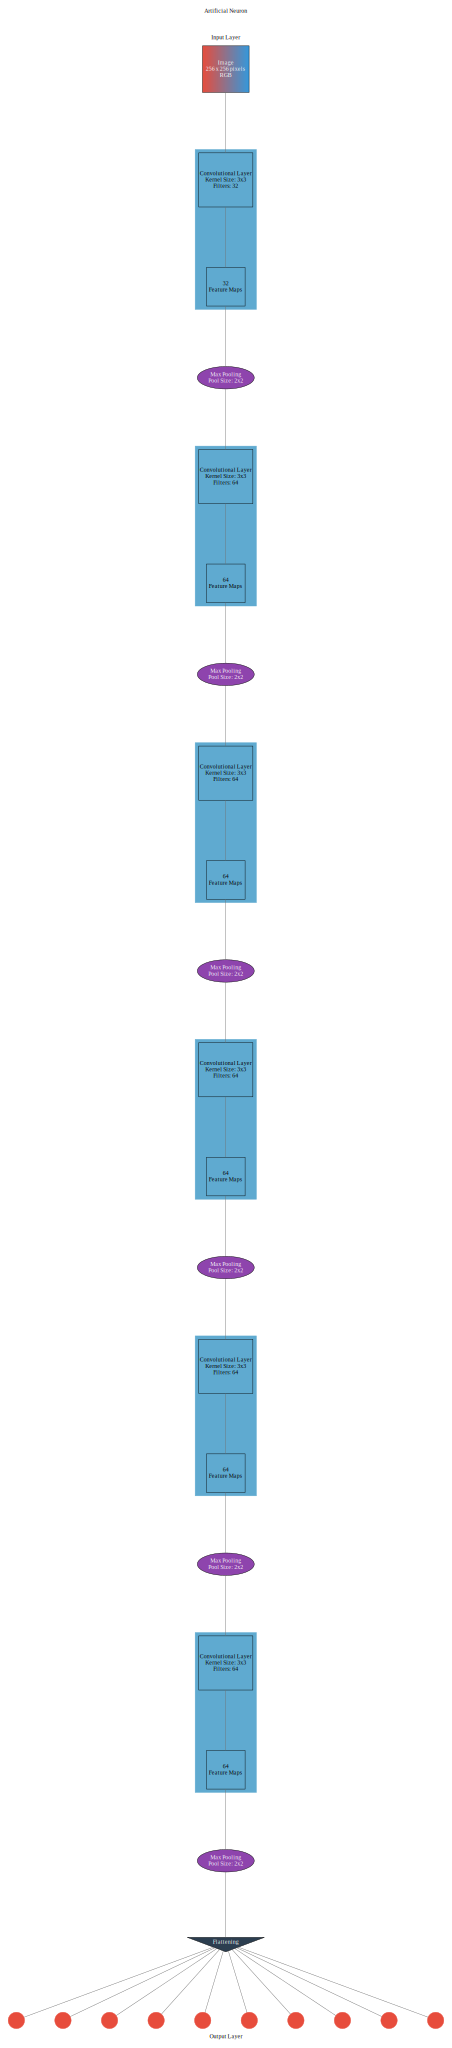

In [17]:
from ann_visualizer.visualize import ann_viz
import graphviz

# Usage
ann_viz(model,filename='my_ann_model.gv',title='Artificial Neuron')
graph_file = graphviz.Source.from_file('my_ann_model.gv')
graph_file

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [19]:
history = model.fit(x,y,epochs=50,validation_split= .1)

Epoch 1/50
39/39 [==============================] - 75s 2s/step - loss: 1.2698 - accuracy: 0.7155 - val_loss: 1.0674 - val_accuracy: 0.7426
Epoch 2/50
39/39 [==============================] - 54s 1s/step - loss: 1.0903 - accuracy: 0.7351 - val_loss: 1.0032 - val_accuracy: 0.7426
Epoch 3/50
39/39 [==============================] - 55s 1s/step - loss: 1.0151 - accuracy: 0.7383 - val_loss: 0.8813 - val_accuracy: 0.7574
Epoch 4/50
39/39 [==============================] - 54s 1s/step - loss: 0.9424 - accuracy: 0.7383 - val_loss: 1.7285 - val_accuracy: 0.7500
Epoch 5/50
39/39 [==============================] - 55s 1s/step - loss: 1.0874 - accuracy: 0.7490 - val_loss: 0.8640 - val_accuracy: 0.7794
Epoch 6/50
39/39 [==============================] - 56s 1s/step - loss: 0.8722 - accuracy: 0.7514 - val_loss: 0.8363 - val_accuracy: 0.7647
Epoch 7/50
39/39 [==============================] - 56s 1s/step - loss: 0.8015 - accuracy: 0.7621 - val_loss: 0.7977 - val_accuracy: 0.7794
Epoch 8/50
39/39 [==

In [20]:
model.save('ann_model.h5')

In [21]:
history

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

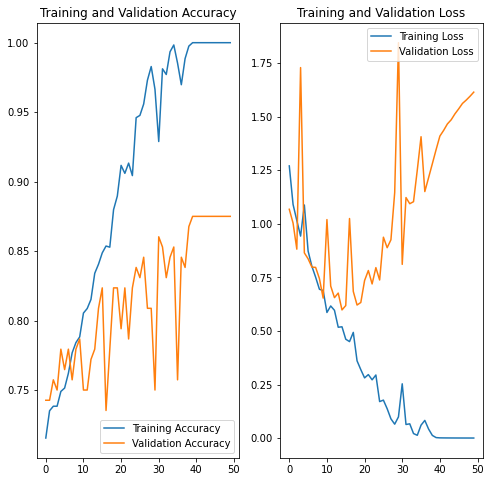

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()